In [2]:
from astropy import coordinates,units,constants
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii

In [12]:
## load all satellite galaxies
data = ascii.read("./Drlica-Wagner2020.txt")

## let's calculate the angular size of these galaxies ---## oops they're actually in the column ah
distance=np.array(data['D'])## distance of these galaxies in kpc


### Crab pulsar let's say 1kJy for a reasonable example?
crabgp=1500*units.Jy 
# crabgp=100*units.Jy ## 1.4 GHz based on -3.3 scale
#crabgp=4.92e3*units.Jy ## 1kJy at 1.4 GHz 



crab=(7175*units.lightyear).to(units.kpc)
print (crab)
crab_pf=14*units.mJy.to(units.Jy)

vela_pf=1100*units.mJy.to(units.Jy)
vela=0.28*units.kpc

mockcrab=crabgp*(crab**2)/((distance*units.kpc)**2)
print('Crab GP at 10kpc:',crabgp*crab**2/(10*units.kpc)**2)

data.add_column(col=mockcrab,name='CrabGP')
print (data) ## if you want to have a look at the whole table

2.1998650004285607 kpc
Crab GP at 10kpc: 72.59109030165828 Jy
       Name       Survey Class  RAdeg   ... r1/2  VMag Ref        CrabGP      
                                 deg    ...  pc   mag               Jy        
----------------- ------ ----- -------- ... ---- ----- --- -------------------
        Antlia II     --     4 143.8868 ... 2301 -9.03   1  0.4166155320343106
      Aquarius II    PS1     4 338.4813 ...  125  -4.4   2  0.6223515972364393
         Bootes I    PS1     4   210.02 ...  160 -6.02   3  1.6664621281372425
        Bootes II    PS1     4 209.5141 ...   33 -2.94   3   4.115141173563394
       Bootes III    PS1     4    209.3 ...  289 -5.75   4  3.2861516659872465
        Bootes IV    PS1     3  233.689 ...  277 -4.53   5 0.16618458895551447
 Canes Venatici I    PS1     4 202.0091 ...  338  -8.8   3 0.15274617099077997
Canes Venatici II    PS1     4 194.2927 ...   55 -5.17   3 0.28355894649085267
           Carina     --     4 100.4065 ...  248 -9.43   3  0.6584225

In [11]:
f=open("angular_res.txt",'w')
print(data['Name', "ah","e"][data["Name"]=='Canes Venatici II'])


print(data['Name', "ah","e"][data["Name"]=='Canes Venatici I'])
print(data['Name', "ah","e"][data["Name"]=='Leo II'])
print(data['Name', "ah","e"][data["Name"]=='Ursa Minor'])
print(data['Name', "ah","e"][data["Name"]=='Fornax'])
print(data['Name', "ah","e"][data["Name"]=='Scupltor'])
print(data['Name', "ah","e"][data["Name"]=='Sagittarius II'])
for name in ['Canes Venatici II','Canes Venatici I','Leo II',"Ursa Minor", "Fornax", "Sculptor", "Sagittarius II"]:
    angsize=(data["ah"][data["Name"]==name][0]**2)*np.sqrt(1-data["e"][data["Name"]==name][0]**2)*3.14
    a=data["ah"][data["Name"]==name][0]
    crabby=data["CrabGP"][data["Name"]==name][0]
    b=np.sqrt(data["ah"][data["Name"]==name][0]**2*(1-data["e"][data["Name"]==name][0]**2))
    print(name,angsize,a,b,a//33+1,b//33+1)
    print(name,crabby,data["D"][data["Name"]==name][0])
    f.write(name+";"+str(np.round(angsize,1))+';'+str(np.round(angsize/6.65,1))+';'+str(np.round(angsize/6.65/4,1))
            +';'+str()+"\n")
f.close()

       Name         ah    e 
                  arcmin    
----------------- ------ ---
Canes Venatici II   1.52 0.4
      Name         ah    e  
                 arcmin     
---------------- ------ ----
Canes Venatici I   7.12 0.44
 Name    ah    e  
       arcmin     
------ ------ ----
Leo II   2.52 0.07
   Name      ah    e  
           arcmin     
---------- ------ ----
Ursa Minor   18.3 0.55
 Name    ah    e  
       arcmin     
------ ------ ----
Fornax   19.6 0.29
Name   ah    e 
     arcmin    
---- ------ ---
     Name        ah    e 
               arcmin    
-------------- ------ ---
Sagittarius II    1.6 0.1
Canes Venatici II 6.649002052173111 1.52 1.3931030112665754 1.0 1.0
Canes Venatici II 0.28355894649085267 Jy 160
Canes Venatici I 142.94365904547573 7.12 6.393744142519311 1.0 1.0
Canes Venatici I 0.15274617099077997 Jy 218
Leo II 19.891342380034157 2.52 2.51381841826334 1.0 1.0
Leo II 0.13371233638795757 Jy 233
Ursa Minor 878.2212341174969 18.3 15.28351317596841 1.0 1.

In [ ]:
hi_query=np.loadtxt('query.txt',dtype=str,delimiter='\t')[1:]
#name          halpha_mag      h1_21_cm_mag                log_h1_mass
logh1mass=hi_query.T[-1]
print (hi_query)

In [ ]:
### filter parkes sample
##parkes dec -32.99839
gmrt_targets=data[(data['DEdeg']>(-53))*(data['Class']==4)]
# print(pks_targets)
# print(gmrt_targets['CrabGP'])
print (gmrt_targets)
f=open("satellite gal names GMRT.txt",'w')
for i in gmrt_targets['RAdeg','DEdeg']:
    f.write(str(i[0])+" "+str(i[1])+"; ")
#     print(i[0],i[1])
f.close()

# for i in gmrt_targets:
#     print(i["CrabGP"])
print(hi_query[0][0])
gmrt_targets["Name"]==hi_query[0][0]

In [8]:
plt.hist(pks_targets['ah'],bins=30)
plt.xlabel("Arcmin")
plt.show()
plt.hist(pks_targets['D'],bins=30)
plt.xlabel("kpc")
plt.show()

NameError: name 'pks_targets' is not defined

In [9]:
###radiometer equation
def radiofunc(sigma,tsys,tsky,G,B,tobs):
    return (sigma*(tsys+tsky))/(G*np.sqrt(2*B*tobs))
### an sefd way of estimation
def sefd_rms(sigma,sefd,tobs,b):
    return (sefd/np.sqrt(tobs*b)*sigma)

tsky=2.5 ###kelvin


###parkes telescope UWL
pks_tsys=21
pks_g=1.8
#pks_sefd=29
pks_b=(4-0.7)*1e9 ###Hz

single_bw=pks_b/8192
tobs=0.001 ###width or integration time ##seconds
print("Parkes Radio Telescope UWL")
pks_sens=radiofunc(10,pks_tsys,tsky,pks_g,pks_b,tobs)
singlechan_sens=radiofunc(10,pks_tsys,tsky,pks_g,single_bw,tobs)

print(pks_sens,"Jy ms for single pulse total")
print(singlechan_sens, "Jy ms")

print("1 hour integration sensitivity",radiofunc(10,pks_tsys,tsky,pks_g,pks_b,3600) )

Parkes Radio Telescope UWL
0.05081868107721053 Jy ms for single pulse total
4.599581952083462 Jy ms
1 hour integration sensitivity 2.678379664828073e-05


one kilojansky pulse every 33.3924123 seconds
1.4 GHz flux 0.1538930516681145
1kJy 1.4 GHz flux- ---> translates to 6.498019170849886


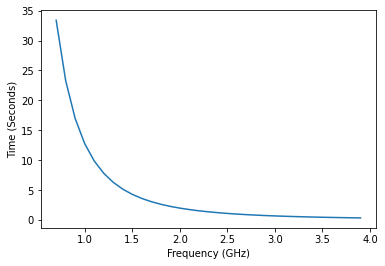

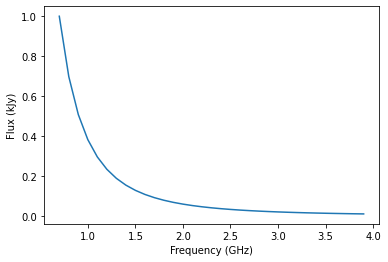

In [10]:
#Crab GP
#1 kJy ms pulse ~ 0.1% of all rotations
# crab period 0.0333924123 s

tobs_1p=0.0333924123/0.001
print ("one kilojansky pulse every",tobs_1p,"seconds")

plt.plot(np.arange(0.7,4,0.1),tobs_1p*(np.arange(0.7,4,0.1)/0.7)**(-2.7))
plt.ylabel("Time (Seconds)")

# plt.plot(np.arange(0.7,4,0.1),1*(np.arange(0.7,4,0.1)/0.7)**(-2.3))
# plt.ylabel("Flux Jy")
plt.xlabel("Frequency (GHz)")
plt.figure()
plt.plot(np.arange(0.7,4,0.1),1*(np.arange(0.7,4,0.1)/0.7)**(-2.7))
print ("1.4 GHz flux",1*2**(-2.7))
print ("1kJy 1.4 GHz flux- ---> translates to",1/2**(-2.7))

plt.xlabel("Frequency (GHz)")
plt.ylabel("Flux (kJy)")
plt.show()

In [11]:
###survey times in seconds

pmbs_time=2100
htru_time=4300
askap_t=10*3600 ##hrs
superb_t=560

utmost=9
#### craft-gp has 63.117 antenna_days
gp_total=63.117*24 ###hours
####parkes and ASKAP FOV
askap=22.9022104447
parkes=0.5558873668
palfa=0.01713858784 ##3.35 arcmin (3.35/2/60)^2*7*pi
gbt=0.03692682 ##13 arcmin (3.35/2/60)^2*7*pi
print("gbt fov is %.5f"%((13.01/2/60)**2*np.pi))
print("planned CRAFT-GP total FOV is %f deg $^2$"%(askap*160))
print("real CRAFT-GP total coverage is %f deg $^2$ hrs"%(askap*63.117*24))


##### log normal pulse stack distribution

def log_normal(sigma,mu,x):
    pdf = (np.exp(-(np.log(x) - mu)**2 / (2 * (sigma**2)))/ (x * sigma * np.sqrt(2 * np.pi)))
    ##e^(-(log(x) - μ)^2/(2 σ^2))/(sqrt(2 π) σ x)
    return pdf

def gauss_normal(x):
    pdf=np.exp(-(x)**2/(2 * 1**2))/ (1 * np.sqrt(2 * np.pi))
    return pdf
print(log_normal(0.1,1.0,1))

gbt fov is 0.03693
planned CRAFT-GP total FOV is 3664.353671 deg $^2$
real CRAFT-GP total coverage is 34692.451599 deg $^2$ hrs
7.694598626706474e-22


In [12]:
plt.figure(figsize=(8,9))
from scipy import signal
b_rate=np.loadtxt('../cat/b_rates')
b_wd=np.loadtxt('../cat/b_wd')
b_flux=np.loadtxt('../cat/b_rates_flux')

oc=b_rate#/3600
flux=b_flux/1000

max=np.where(flux==flux.max())[0][0]
###oc[max],flux[max]
###normalized energy value is
lgn_e=flux[max]
print(oc[max],lgn_e)

lgn_sig=0.15
lgn_mu=1.5

distr=np.arange(0.01,10,0.01)
#fluxx3=log_normal(lgn_sig,lgn_mu,5)
fdistr=log_normal(lgn_sig,lgn_mu,distr)
distr=np.arange(0.01,10,0.01)
distr2=np.arange(-3,3,0.01)

#fluxx3=log_normal(lgn_sig,lgn_mu,3)
fdistr=log_normal(lgn_sig,lgn_mu,distr)
g_noise=gauss_normal(distr2)


max=np.where(flux==flux.max())[0][0]



res=signal.convolve(fdistr, g_noise, mode='same') / sum(fdistr)
#print (distr2)
apos=np.where(res==res.max())
x_res=np.linspace(0,10,len(res))
dpos=x_res[apos]-1
x_res=x_res-dpos
#print(np.intersect1d(np.where(x_res>5),np.where(x_res<5.01)))
sig5pos=np.intersect1d(np.where(x_res>5),np.where(x_res<5.01))[0]
print(res.max())
#print(sum(fdistr*distr))
#print(fluxx3,fluxx3*oc[max])


plt.xscale('log')
plt.yscale('log')
plt.ylabel('Flux Density (Jy)')
plt.xlabel("Telescope $\\tau_{Obs}$ (Hrs$^{-1}$)")


crab_rate=1/(tobs_1p*(1.4/0.7)**(-2.3))*3600
# plt.plot([crab_rate,crab_rate],[1e-2,1000],label='rate at 1.4GHz crab 1kJy GP')
k=200
for i in pks_targets:
    plt.plot([crab_rate-10,crab_rate+100],[i["CrabGP"].value,i["CrabGP"].value])
    plt.annotate(i["Name"],(crab_rate+2*k,i["CrabGP"].value))
    
plt.plot([1e-1,1e6],[pks_sens,pks_sens],'--',c='C0',linewidth=3,label="Parkes 10 sigma pulse fluence")
plt.scatter(oc[max],flux[max],s=100,marker="d",c='red',label='Brightest RRAT')
#plt.plot(oc[max]*fdistr,flux[max]*distr)
plt.plot(oc[max]*res,flux[max]*x_res,label="pdf distribution * measured rate")
plt.xlim(1e-1,1e6)
plt.ylim(1e-2,1.5e2)
#plt.grid(True)
plt.legend(loc=3)
plt.tight_layout()
plt.savefig("rrat_space.pdf")
plt.show()
#print(pmbs_y)
print(len(oc))

OSError: ../cat/b_rates not found.

<Figure size 576x648 with 0 Axes>

In [ ]:
for name in pks_targets["Name"]:
    print (name)
    mask=pks_targets["Name"]==name
#     print (pks_targets[mask]["ah","e"])
    a=pks_targets[mask]["ah"][0]
    e=pks_targets[mask]["e"][0]
    b=np.sqrt(a**2*(1-e**2))
    print ('a value',a)
    print ('b value',b)
    print ("pointings needed",a/6,' x ',b/6,' = ', np.round(a/6+1)*np.round(b/6+1))

In [ ]:
#LeoIV 